In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Téléchargement des données 

## Données conso : 

Les données sont téléchargées sur : <br/>
https://www.rte-france.com/fr/eco2mix/eco2mix-telechargement

In [2]:
data = pd.read_excel("data.xlsx")
data.head()

,Mois,Qualité,Territoire,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,...,Production bio-énergies,Consommation totale,Solde exportateur,Echanges export,Echanges import,Echanges avec le Royaume-uni,Echanges avec l'Espagne,Echanges avec l'Italie,Echanges aves la Suisse,Echanges avec l'Allemagne et la Belgique
0,0000-00,Données consolidées,Grand-Est,7296,5505.0,864,153.0,8,701,537,...,70,3364,3876.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000-00,Données définitives,Nouvelle-Aquitaine,4523,3740.0,26,NaN,9,16,162,...,131,3222,1300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000-00,Données définitives,Auvergne-Rhône-Alpes,8890,5946.0,32,4.0,17,10,2632,...,79,5010,3658.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000-00,Données définitives,Bourgogne-Franche-Comté,152,NaN,19,0.0,0,19,19,...,20,1533,-1383.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000-00,Données définitives,Bretagne,197,NaN,3,NaN,3,0,46,...,37,1493,-1300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Afin de coller avec les données DJU nous allons concentrer l'étude sur une région, et nous ne gardons que 
#Les données définitives.
conso = data.loc[data['Territoire'] == 'Auvergne-Rhône-Alpes']
conso = conso.loc[conso['Qualité'] == 'Données définitives']

#Les colonnes qui nous intéressent désormais sont la date et la conso : 
conso = conso[['Mois', 'Consommation totale']]

#Pas de données avant Janvier 2014, on enlève donc les mois précédents : 
conso = conso.loc[conso['Mois'] > "2013-12"]

#Les données DJU vont jusqu'au 05/2018 :
conso = conso.loc[conso['Mois'] < "2018-05"]

#On renomme les colonnes : 
conso = conso.rename(columns={'Mois':'date', 'Consommation totale':'consommation'})

#Split la colonne date en Année et Mois : 
#conso['annee'], conso['mois'] = conso['date'].str.split(pat='-').str
#conso = conso.drop(columns='date')

#On convertie ensuite la date en datetime :
from datetime import datetime
conso['date'] = pd.to_datetime(conso['date'], format='%Y-%m')
#Set index sur date : 
conso = conso.set_index('date')

conso.head()

,consommation
date,
2014-01-01,6693
2014-02-01,6013
2014-03-01,5965
2014-04-01,5139
2014-05-01,4858


## Données DJU

Données téléchargées sur : <br/>
https://cegibat.grdf.fr/simulateur/calcul-dju

In [15]:
dju = pd.read_excel('DJU.xlsx')

#On doit maintenant mettre en forme le Df, afin d'avoir une colonne année, une mois, une valeur :
dju = dju.stack()
dju = pd.DataFrame(dju)
dju = dju.reset_index()
dju = dju.rename(columns={"level_0":'annee', 'level_1':'mois', 0:'valeur'})

Il nous faut maintenant un index contenant la date complète; <br/>
On doit d'abord transformer le nom du mois en chiffre : 

In [16]:
def moisEnNum(shortMonth):
    m = {
            'Janvier' : 1,
            'Février' : 2,
            'Mars' : 3,
            'Avril' : 4,
            'Mai' : 5,
            'Juin' : 6,
            'Juillet' : 7,
            'Août' : 8,
            'Septembre' : 9, 
            'Octobre' : 10,
            'Novembre' : 11,
            'Décembre' : 12
    }
    resultats = []
    for i in shortMonth:
        out = m[i]
        resultats.append(out)    
    return resultats
    

dju['mois_num'] = moisEnNum(dju['mois'])

#On transforme ensuite cette colonne en date, ainsi que la colonne année : 
dju['date'] = dju['mois_num'].map(str) + '/' +  dju['annee'].map(str)
dju['date'] = pd.to_datetime(dju['date'], format='%m/%Y')

#On enlève les valeurs après Mai 2018 : 
dju = dju.loc[dju.date <= '2018/05/01']

#On set l'index sur date: 
dju = dju.set_index('date')

#On ne garde que la colonne valeur : 
dju = dju[['valeur']]
dju.head()

,valeur
date,
2014-01-01,333.3
2014-02-01,294.7
2014-03-01,278.5
2014-04-01,184.0
2014-05-01,121.4


## Visualisation :

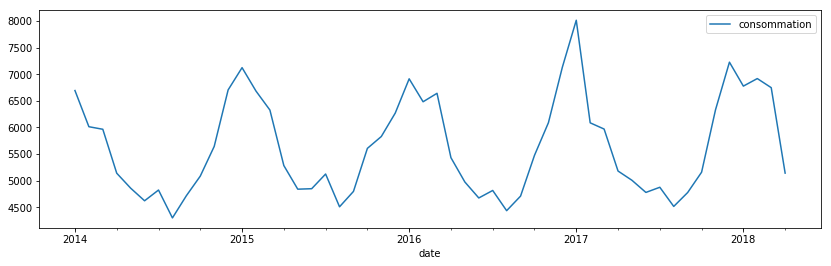

In [12]:
conso.plot(y='consommation', figsize=[14,4])
plt.show()

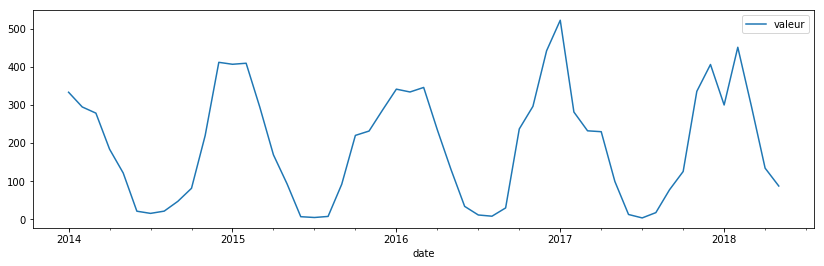

In [17]:
dju.plot(y='valeur', figsize=[14,4])
plt.show()

# Mission 1 : Corrigez les données de consommation mensuelles de l'effet température (dues au chauffage électrique) en utilisant une régression linéaire.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X = conso
#X = X.reshape(-1, 1)
y = dju['valeur']
#y = y.reshape(-1, 1)
reg = LinearRegression().fit(X, y)